<a href="https://colab.research.google.com/github/Izect/CSST-102-3A/blob/main/3A-TEA%C3%91O-MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('customer_segmentation.csv')

# Display the first few rows of the dataset

In [6]:
print(df.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


# Check for missing values

In [7]:
print(df.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [3]:
df.fillna(df.mean(), inplace=True)

# Normalize the data

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])

Visualize

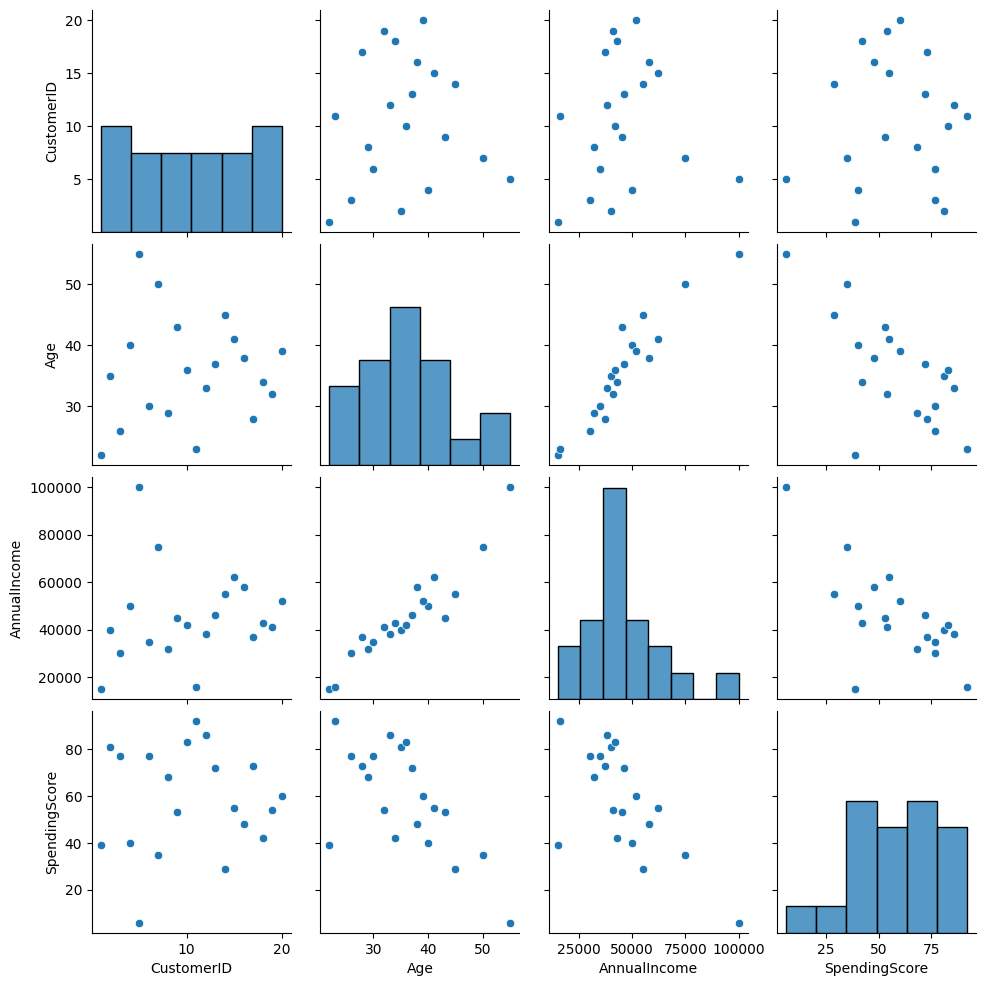

In [10]:
sns.pairplot(df)
plt.show()

Implement K-Means Clustering

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


use the Elbow Method

In [13]:
inertia = []
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Plot the Elbow Method

Text(0, 0.5, 'Inertia')

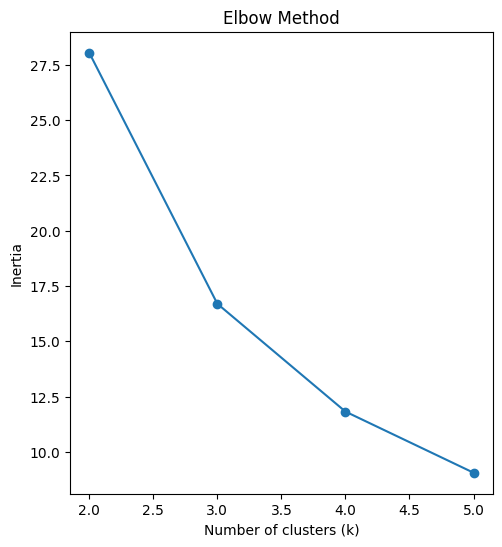

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

Plot Silhouette Scores

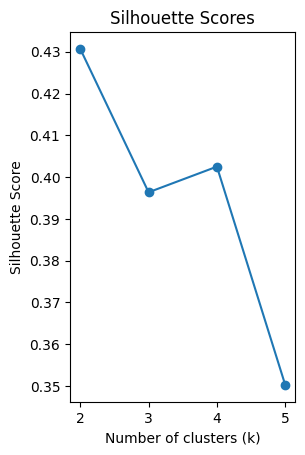

In [15]:
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Model Evaluation

In [16]:
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 2


Visualize the clusters

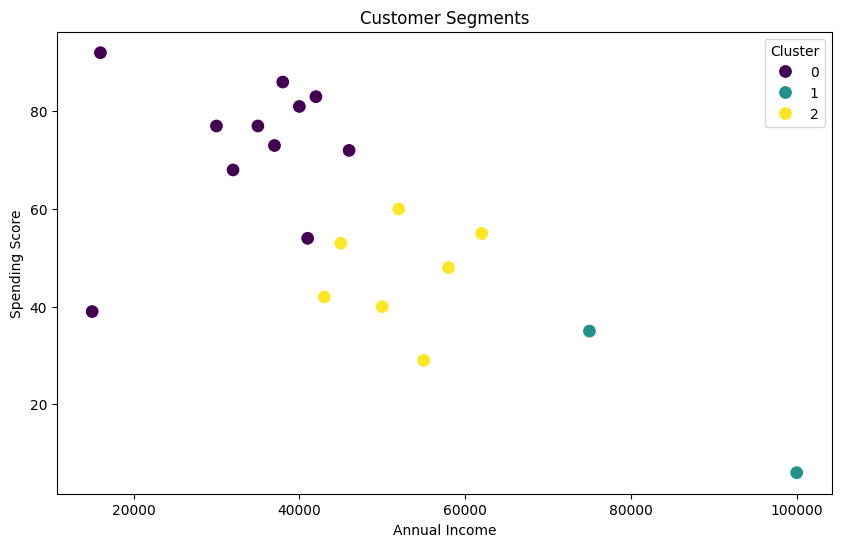

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AnnualIncome'], y=df['SpendingScore'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


In [20]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          9.272727  30.090909  33818.181818      72.909091
1          6.000000  52.500000  87500.000000      20.500000
2         13.714286  40.000000  52142.857143      46.714286
